In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split # train and test 
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report

from collections import Counter
from sklearn.datasets import make_classification

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB as MB

In [2]:
df=pd.read_csv("creditcardLR.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
columns=df.columns[:-1]
columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [4]:
columns_str=''
for i in df.columns:
    columns_str=columns_str+i+'+'
columns_str

'Time+V1+V2+V3+V4+V5+V6+V7+V8+V9+V10+V11+V12+V13+V14+V15+V16+V17+V18+V19+V20+V21+V22+V23+V24+V25+V26+V27+V28+Amount+Class+'

In [5]:
logit_model = sm.logit('Class ~ Time+V1+V2+V3+V4+V5+V6+V7+V8+V9+V10+V11+V12+V13+V14+V15+V16+V17+V18+V19+V20+V21+V22+V23+V24+V25+V26+V27+V28+Amount', data = df).fit()

Optimization terminated successfully.
         Current function value: 0.003914
         Iterations 13


<AxesSubplot:>

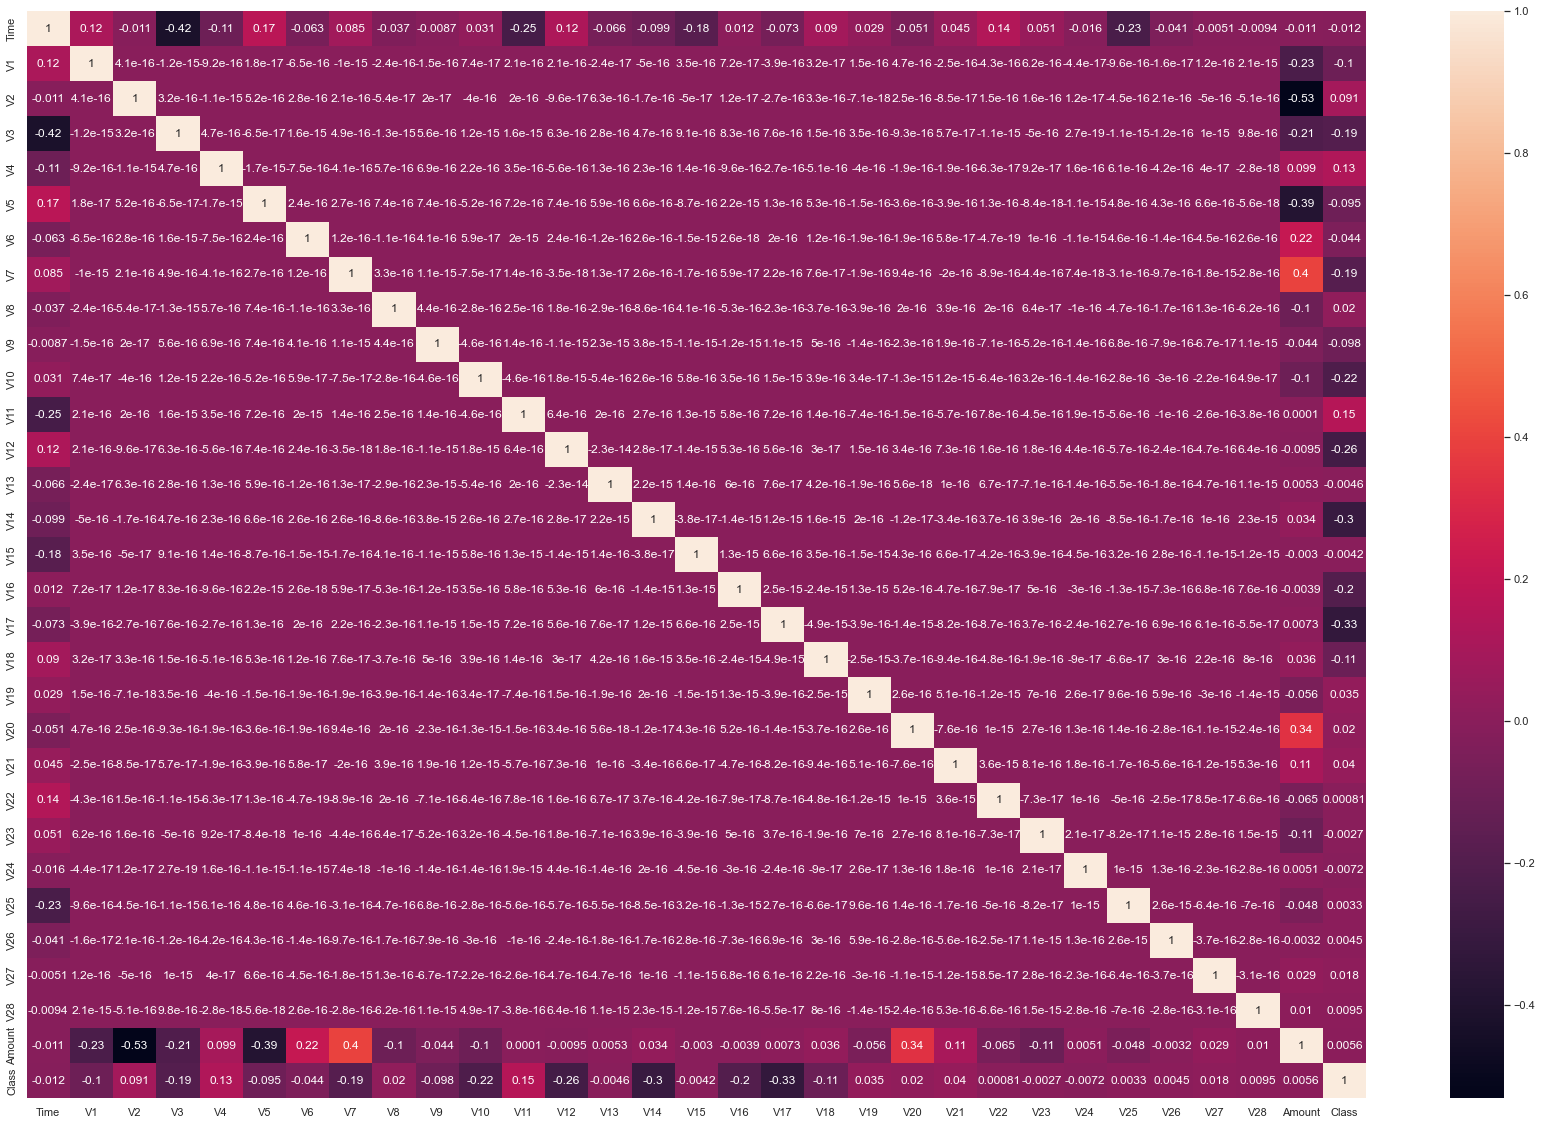

In [6]:
sns.set(rc={'figure.figsize':(30,20)})
sns.heatmap(df.corr(),annot=True)

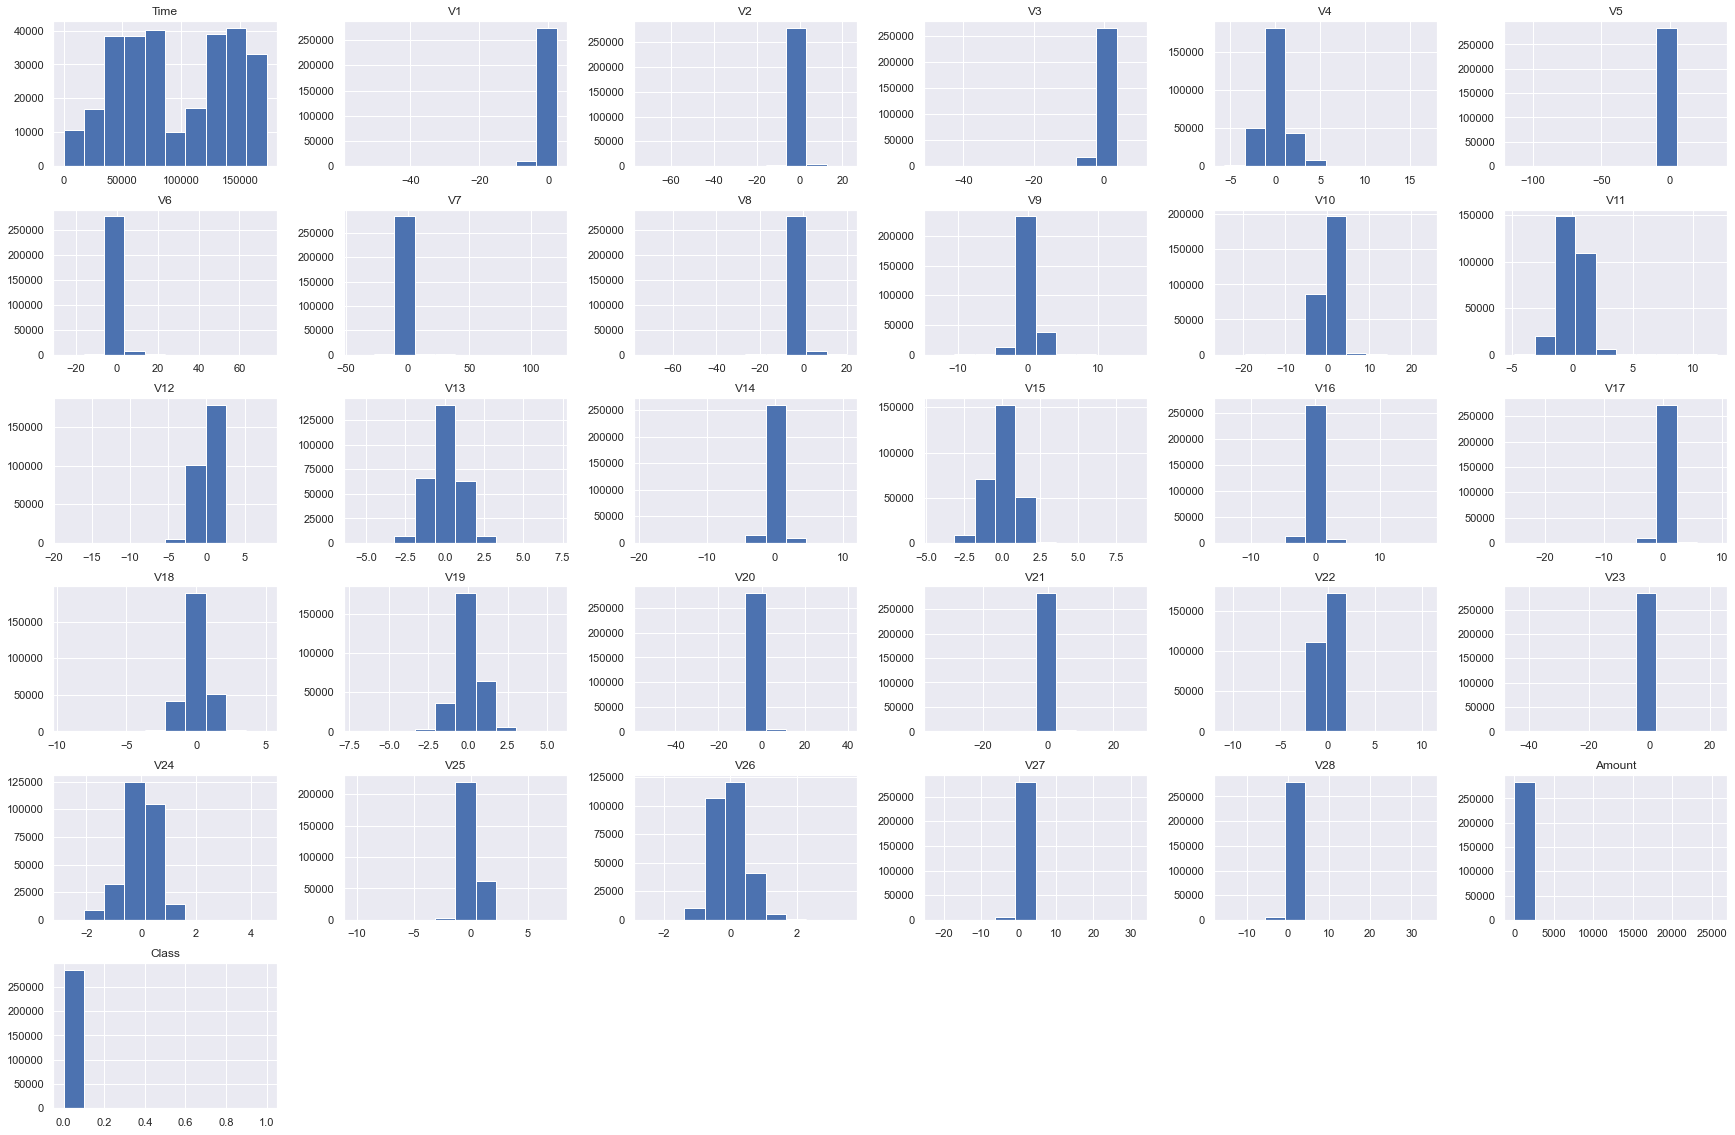

In [7]:
df.hist()
plt.show()

In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
def getOutlierThresholds(col):
    Q3 = np.quantile(col, 0.75)
    Q1 = np.quantile(col, 0.25)
    IQR = Q3 - Q1
    lower_rng = Q1 - 1.5*IQR
    upper_rng = Q3 + 1.5*IQR
    outl_high = list(filter(lambda x: x > upper_rng, col))
    outl_low = list(filter(lambda x: x < lower_rng, col))
    return len(outl_high)/len(col), len(outl_low)/len(col)

In [10]:
thresholds = df.apply(getOutlierThresholds)
thresholds

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,0.000000,0.017893,0.000070,0.031267,0.029532,0.074482,0.014529,0.041772,0.020519,...,0.028296,0.001373,0.036414,0.000478,0.005895,0.017089,0.068885,0.041432,0.11202,0.001727
1,0.0,0.024796,0.029599,0.011738,0.007876,0.013637,0.006152,0.016889,0.042966,0.008564,...,0.022605,0.003251,0.028686,0.016285,0.012949,0.002560,0.068622,0.065104,0.00000,0.000000


In [11]:
from scipy.stats.mstats import winsorize
data_2 = df.copy()
for cl in df.columns:
    data_2[cl] = winsorize(df[cl], limits = [thresholds[cl][1], thresholds[cl][0]])

In [12]:
if data_2.shape==df.shape:
    print('no outliers')

no outliers


In [13]:
target=df.Class
df.drop(columns='Class',inplace=True)

# PCA on default dataset

In [14]:
df_norm=scale(df)
df_norm

array([[-1.99658302, -0.69424232, -0.04407492, ...,  0.33089162,
        -0.06378115,  0.24496426],
       [-1.99658302,  0.60849633,  0.16117592, ..., -0.02225568,
         0.04460752, -0.34247454],
       [-1.99656197, -0.69350046, -0.81157783, ..., -0.13713686,
        -0.18102083,  1.16068593],
       ...,
       [ 1.6419735 ,  0.98002374, -0.18243372, ...,  0.01103672,
        -0.0804672 , -0.0818393 ],
       [ 1.6419735 , -0.12275539,  0.32125034, ...,  0.26960398,
         0.31668678, -0.31324853],
       [ 1.64205773, -0.27233093, -0.11489898, ..., -0.00598394,
         0.04134999,  0.51435531]])

In [15]:
pca=PCA(n_components=30)
pca_values=pca.fit_transform(df_norm)

In [16]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var

array([0.06527521, 0.05612313, 0.03333333, 0.03333333, 0.03333333,
       0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333,
       0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333,
       0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333,
       0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333,
       0.03333333, 0.03333333, 0.03333333, 0.01052982, 0.00140516])

In [17]:
pca.components_
pca.components_[0]

array([-0.02964694, -0.17155171, -0.39155023, -0.14252769,  0.07606448,
       -0.29026605,  0.16122107,  0.29036913, -0.07487067, -0.03236018,
       -0.07579816,  0.0077398 , -0.01088356,  0.00594243,  0.02794457,
        0.00347389, -0.00325127,  0.00765762,  0.02349169, -0.04230384,
        0.25186065,  0.07678295, -0.05224303, -0.08464112,  0.00429563,
       -0.02806522, -0.00108464,  0.02141568,  0.00785595,  0.70664894])

In [18]:
# Cumulative variance 
var1 = np.cumsum(np.round(var, decimals = 4) * 100)
var1

array([ 6.53, 12.14, 15.47, 18.8 , 22.13, 25.46, 28.79, 32.12, 35.45,
       38.78, 42.11, 45.44, 48.77, 52.1 , 55.43, 58.76, 62.09, 65.42,
       68.75, 72.08, 75.41, 78.74, 82.07, 85.4 , 88.73, 92.06, 95.39,
       98.72, 99.77, 99.91])

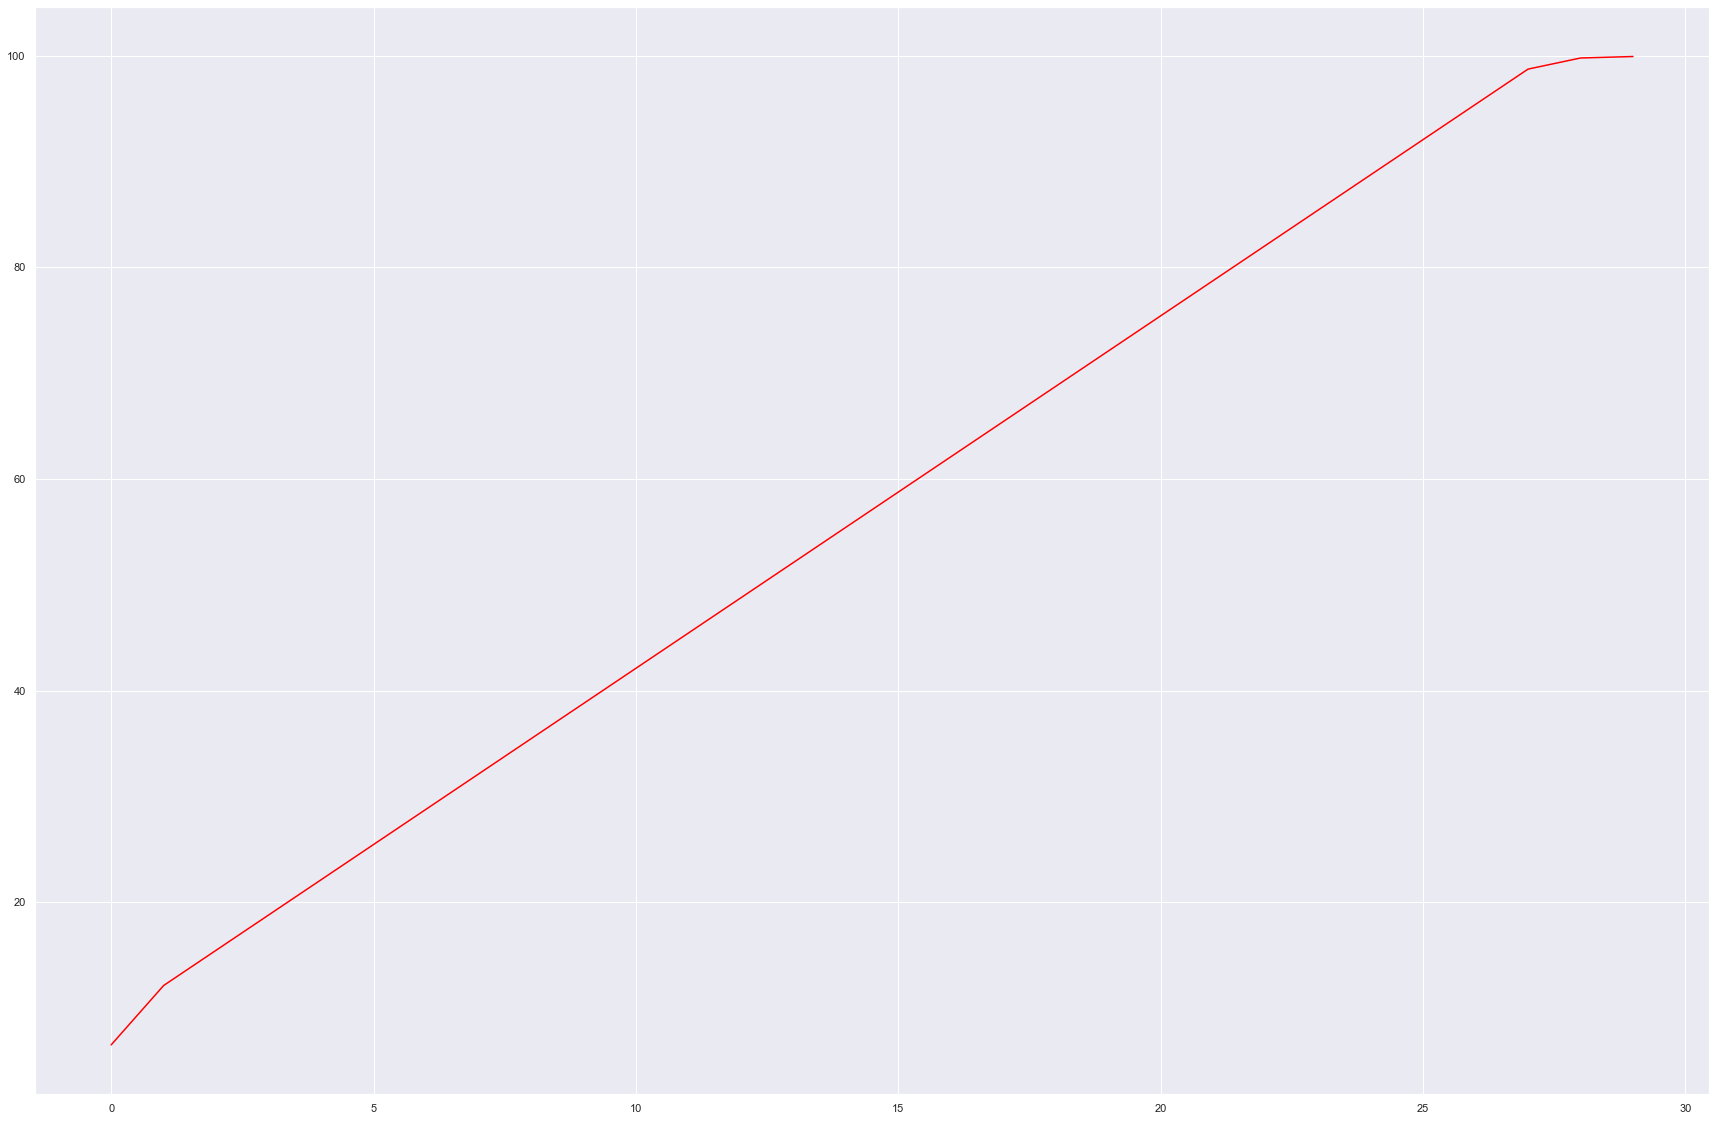

In [19]:
# Variance plot for PCA components obtained 
plt.plot(var1, color = "red")

In [20]:
df_norm=pd.DataFrame(df_norm)
target=pd.DataFrame(target)

In [21]:
df_norm.columns=columns
df_norm

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,0.326118,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.089611,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.680975,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.269855,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,0.529939,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.641931,-6.065842,6.099286,-6.486245,-1.459641,-3.886611,-1.956690,-3.975628,6.116573,1.742559,...,1.914365,0.290602,0.154146,1.624574,-0.841000,2.756320,0.518500,2.337901,2.495529,-0.350151
284803,1.641952,-0.374121,-0.033356,1.342145,-0.521651,0.629040,0.794446,0.019667,0.246886,0.532299,...,0.077330,0.291625,1.273781,0.019958,-1.677920,-1.163726,-0.819647,0.169641,-0.162164,-0.254117
284804,1.641974,0.980024,-0.182434,-2.143205,-0.393984,1.905833,2.275262,-0.239939,0.593140,0.393630,...,0.001811,0.315913,0.796788,-0.060053,1.056944,0.509797,-0.181182,0.011037,-0.080467,-0.081839
284805,1.641974,-0.122755,0.321250,0.463320,0.487192,-0.273836,0.468155,-0.554672,0.568631,0.356887,...,0.165300,0.361112,1.102451,-0.261503,0.203428,-1.091855,1.133635,0.269604,0.316687,-0.313249


In [22]:
bestfeatures=SelectKBest(score_func=chi2,k=28)

In [23]:
x_abs=df_norm.abs()

In [24]:
fit=bestfeatures.fit(x_abs,target)
ccscores=pd.DataFrame(fit.scores_)
cccolumns=pd.DataFrame(x_abs.columns)

featureScore=pd.concat([cccolumns,ccscores],axis=1)
featureScore.columns=['Features','Score']
featureScore.nlargest(28,'Score')

best_col=featureScore.nlargest(28,'Score').Features
best_col

17       V17
14       V14
12       V12
10       V10
7         V7
16       V16
3         V3
8         V8
11       V11
18       V18
4         V4
21       V21
5         V5
27       V27
2         V2
1         V1
9         V9
28       V28
23       V23
19       V19
20       V20
6         V6
22       V22
25       V25
29    Amount
13       V13
15       V15
24       V24
Name: Features, dtype: object

In [25]:
fscols=[]
for i in best_col:
    fscols.append(i)
fselected=df_norm[fscols]
fselected.shape

(284807, 28)

In [26]:
fselected

,V17,V14,V12,V10,V7,V16,V3,V8,V11,V18,...,V23,V19,V20,V6,V22,V25,Amount,V13,V15,V24
0,0.244863,-0.324610,-0.618296,0.083386,0.193679,-0.536833,1.672773,0.082637,-0.540407,0.030770,...,-0.176911,0.496282,0.326118,0.347068,0.382854,0.246585,0.244964,-0.996099,1.604014,0.110507
1,-0.135170,-0.149982,1.066089,-0.153350,-0.063700,0.529434,0.109797,0.071253,1.580003,-0.218763,...,0.162201,-0.179086,-0.089611,-0.061820,-0.880077,0.320694,-0.342475,0.491418,0.694360,-0.561131
2,1.306868,-0.173114,0.066137,0.190700,0.639776,-3.298235,1.169468,0.207373,0.611830,-0.144790,...,1.456320,-2.778561,0.680975,1.351454,1.063358,-0.628537,1.160686,0.720700,2.562906,-1.138092
3,-0.805445,-0.300360,0.178371,-0.050468,0.192071,-1.209296,1.182516,0.316018,-0.221892,2.345305,...,-0.304777,-1.514205,-0.269855,0.936150,0.007267,1.241904,0.140534,0.510169,-0.689837,-1.941027
4,-0.279081,-1.168034,0.538627,0.691625,0.479302,-0.515205,1.021412,-0.226510,-0.806147,-0.045569,...,-0.220123,0.987037,0.529939,0.071999,1.100011,-0.395202,-0.073403,1.352244,0.191323,0.233250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,2.344999,4.826801,2.714113,4.000715,-3.975628,1.264067,-6.486245,6.116573,-1.560780,0.609219,...,1.624574,-0.838927,1.914365,-1.956690,0.154146,2.756320,-0.350151,-0.692530,-1.009990,-0.841000
284803,-0.030251,-0.704305,0.916535,-0.896292,0.019667,-0.812275,1.342145,0.246886,-0.147141,-1.456950,...,0.019958,-1.898626,0.077330,0.794446,1.273781,-1.163726,-0.254117,1.220526,1.272711,-1.677920
284804,0.369114,-0.532657,0.063169,-0.445225,-0.239939,0.160589,-2.143205,0.593140,0.403262,0.472041,...,-0.060053,-0.709121,0.001811,2.275262,0.796788,0.509797,-0.081839,-0.184571,1.452270,1.056944
284805,0.600385,0.469046,-0.963657,-0.366558,-0.554672,-0.694523,0.463320,0.568631,-1.894609,1.329055,...,-0.261503,3.559840,0.165300,0.468155,1.102451,-1.091855,-0.313249,-1.047032,2.144141,0.203428


In [27]:
pca=PCA(n_components=28)
pca_values_fs=pca.fit_transform(fselected)

In [28]:
# The amount of variance that each PCA explains is 
varfs = pca.explained_variance_ratio_
varfs

array([0.06992276, 0.03571429, 0.03571429, 0.03571429, 0.03571429,
       0.03571429, 0.03571429, 0.03571429, 0.03571429, 0.03571429,
       0.03571429, 0.03571429, 0.03571429, 0.03571429, 0.03571429,
       0.03571429, 0.03571429, 0.03571429, 0.03571429, 0.03571429,
       0.03571429, 0.03571429, 0.03571429, 0.03571429, 0.03571429,
       0.03571429, 0.03571429, 0.00150581])

In [29]:
pca.components_
pca.components_[0]

array([ 5.39577302e-03,  2.49162148e-02, -7.04406926e-03, -7.49321877e-02,
        2.93308132e-01, -2.88614001e-03, -1.55678838e-01, -7.60963472e-02,
        7.67592255e-05,  2.63182432e-02,  7.28869332e-02,  7.82518623e-02,
       -2.85220778e-01,  2.12798964e-02, -3.92303395e-01, -1.68101947e-01,
       -3.26635451e-02,  7.57294923e-03, -8.31490212e-02, -4.14523408e-02,
        2.50558653e-01,  1.59444345e-01, -4.78379486e-02, -3.53147311e-02,
        7.07106781e-01,  3.90776703e-03, -2.20425038e-03,  3.79910539e-03])

In [30]:
# Cumulative variance 
var1fs = np.cumsum(np.round(varfs, decimals = 4) * 100)
var1fs

array([ 6.99, 10.56, 14.13, 17.7 , 21.27, 24.84, 28.41, 31.98, 35.55,
       39.12, 42.69, 46.26, 49.83, 53.4 , 56.97, 60.54, 64.11, 67.68,
       71.25, 74.82, 78.39, 81.96, 85.53, 89.1 , 92.67, 96.24, 99.81,
       99.96])

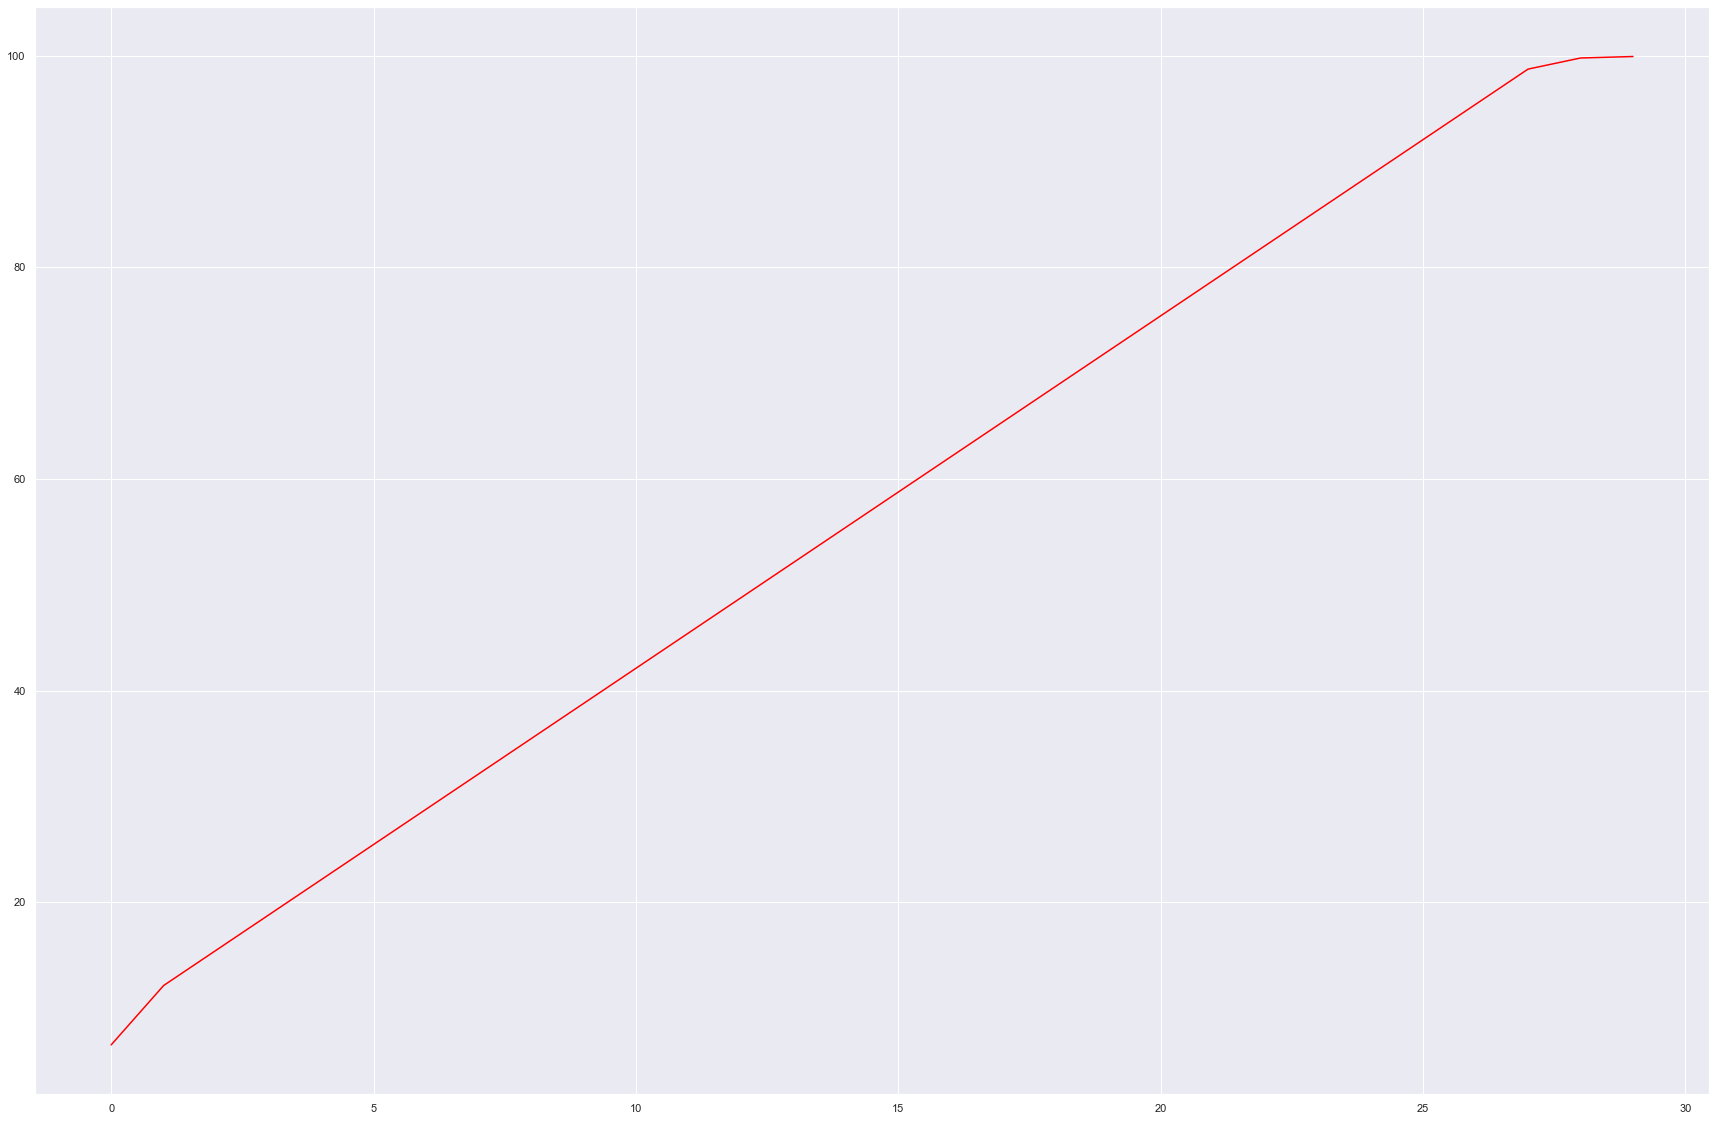

In [31]:
# Variance plot for PCA components obtained 
plt.plot(var1, color = "red")

In [32]:
x_train,x_test,y_train,y_test=train_test_split(pca_values_fs,target,test_size=0.3,
                                              random_state=0,
                                              stratify=target)

In [33]:
lr=LogisticRegression(random_state=14).fit(x_train, y_train)

C:\Users\Thomas Zou\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [34]:
y_pred=lr.predict(x_test)

In [35]:
accuracy_score(y_test,y_pred)

0.99916903666772

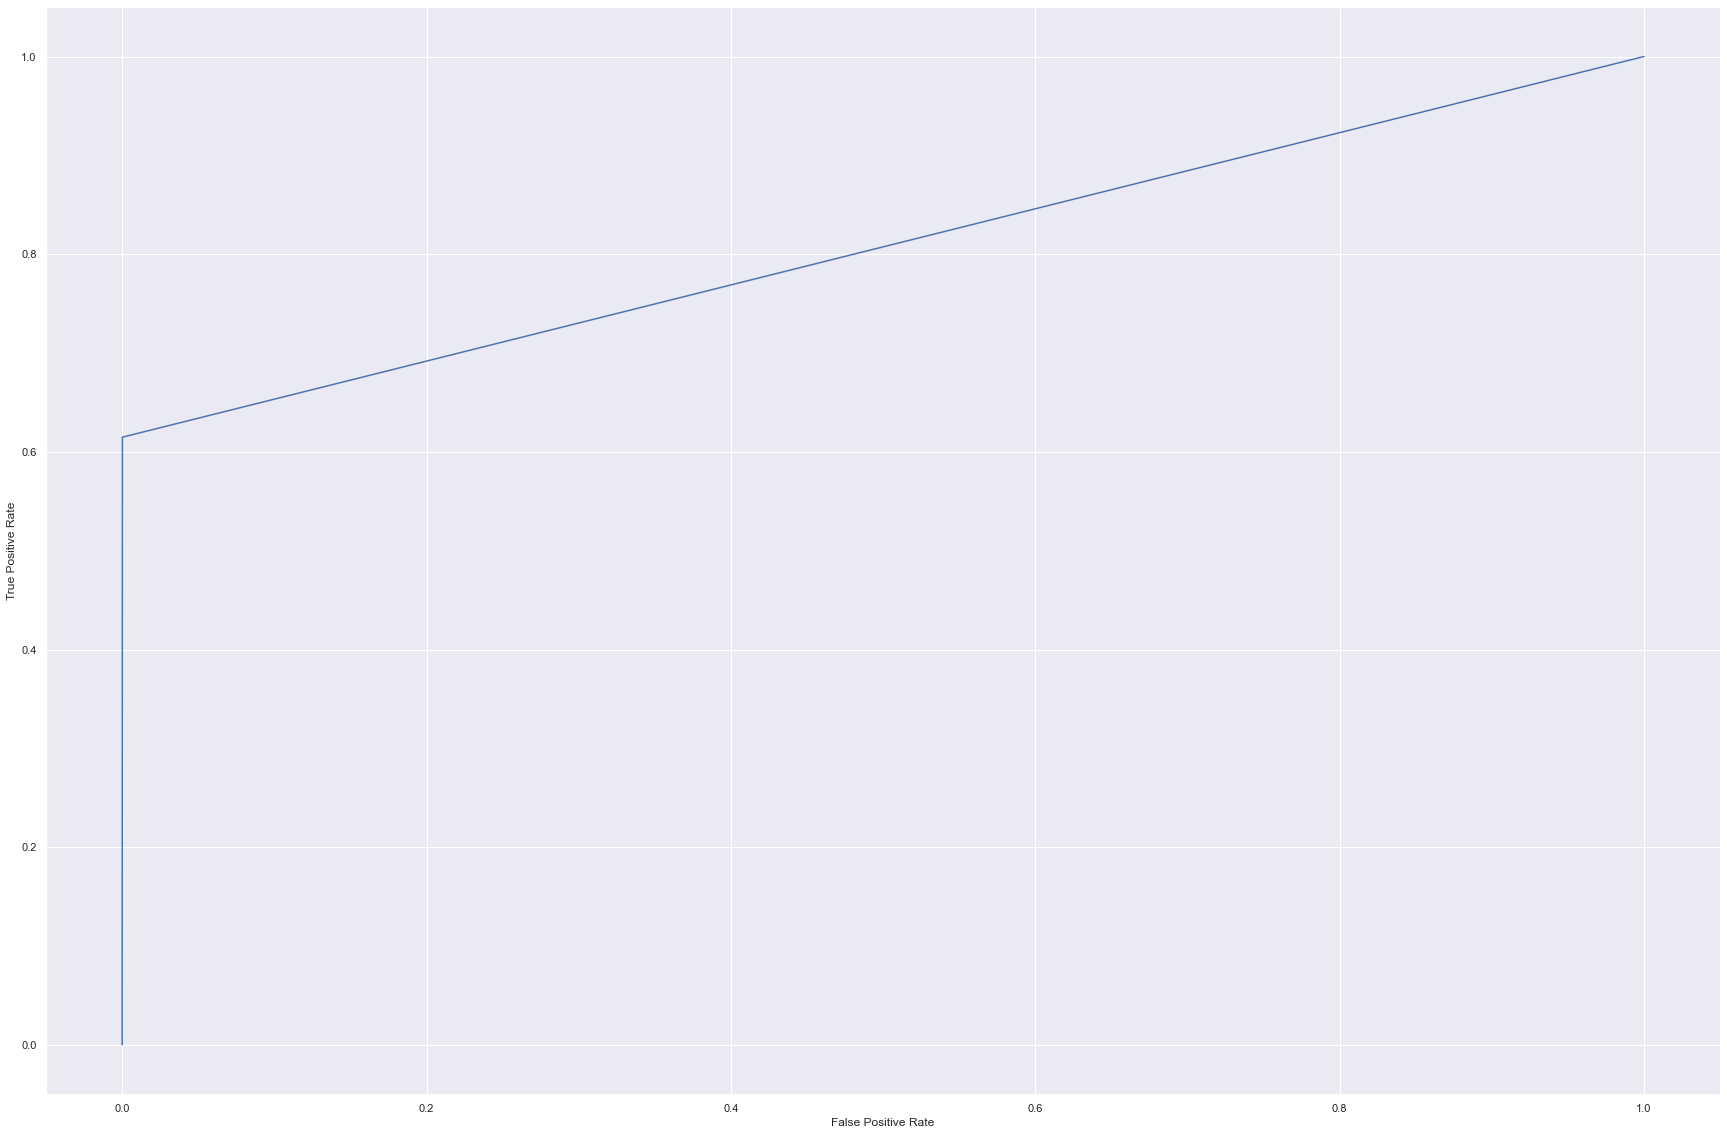

In [36]:
y_pred_proba = lr.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [37]:
confusion_matrx = pd.crosstab(y_pred, y_test.Class)
confusion_matrx

Class,0,1
row_0,,
0,85281,57
1,14,91


In [38]:
classification_test_lr = classification_report(y_pred, y_test.Class)
print(classification_test_lr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85338
           1       0.61      0.87      0.72       105

    accuracy                           1.00     85443
   macro avg       0.81      0.93      0.86     85443
weighted avg       1.00      1.00      1.00     85443



In [39]:
# creating empty list variable 
acc = []

# running KNN algorithm for 3 to 50 nearest neighbours(odd numbers) and 
# storing the accuracy values
best=100
best_k=0
for i in range(3,25,2):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(x_train, y_train)
    train_acc = np.mean(neigh.predict(x_train) == y_train.Class)
    test_acc = np.mean(neigh.predict(x_test) == y_test.Class)
    acc.append([train_acc, test_acc])
    if abs(train_acc-test_acc)<best:
        best=abs(train_acc-test_acc)
        best_k=i

C:\Users\Thomas Zou\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Thomas Zou\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Thomas Zou\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Thomas Zou\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

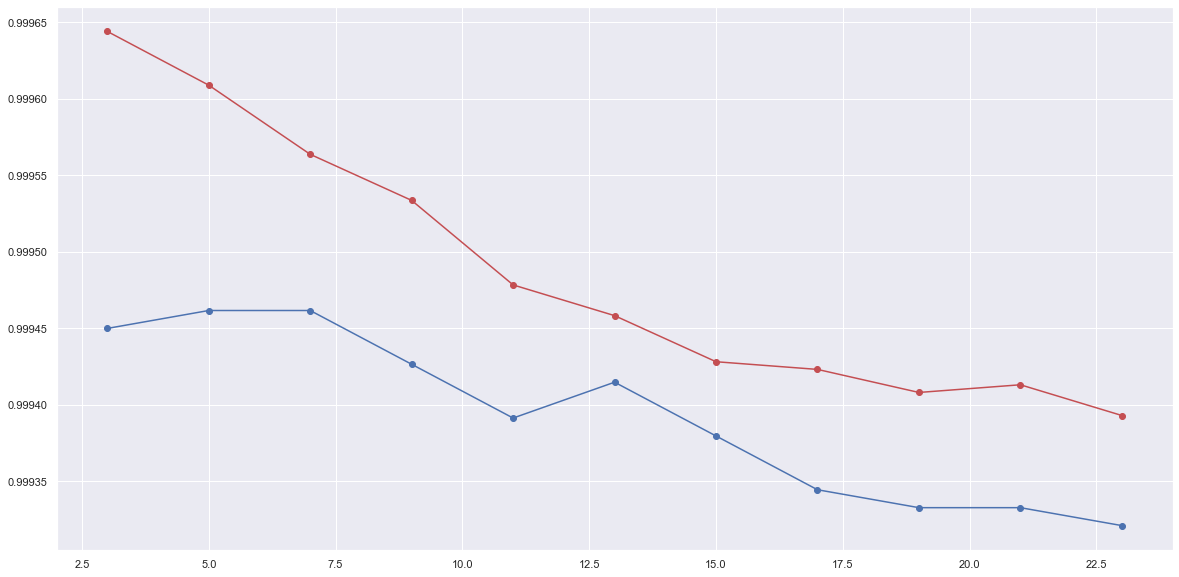

In [40]:
# train accuracy plot 
plt.figure(figsize=(20,10))
plt.plot(np.arange(3,25,2),[i[0] for i in acc],"ro-")
# test accuracy plot
plt.plot(np.arange(3,25,2),[i[1] for i in acc],"bo-")

In [41]:
knn_best = KNeighborsClassifier(n_neighbors = best_k)
knn_best.fit(x_train,y_train)

pred_bestk = knn_best.predict(x_test)
pred_bestk

C:\Users\Thomas Zou\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [42]:
classification_test_knn = classification_report(pred_bestk, y_test.Class)
print(classification_test_knn)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85329
           1       0.72      0.93      0.81       114

    accuracy                           1.00     85443
   macro avg       0.86      0.96      0.90     85443
weighted avg       1.00      1.00      1.00     85443



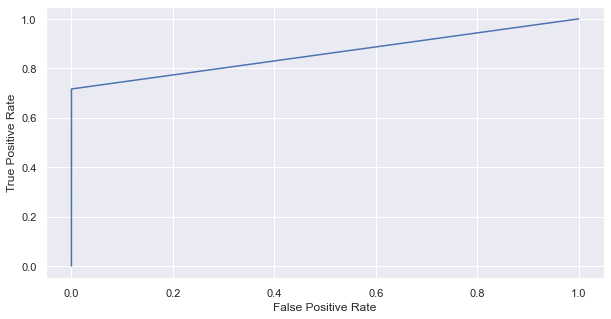

In [102]:
y_pred_proba_knn = knn_best.predict_proba(x_test)[::,1]
fpr_knn, tpr_knn, _ = metrics.roc_curve(y_test,  pred_bestk)

#create ROC curve
plt.figure(figsize=(10,5))
plt.plot(fpr_knn,tpr_knn)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [44]:
columns_fs=''
for i in fselected.columns:
    columns_fs=columns_fs+i+'+'
columns_fs

'V17+V14+V12+V10+V7+V16+V3+V8+V11+V18+V4+V21+V5+V27+V2+V1+V9+V28+V23+V19+V20+V6+V22+V25+Amount+V13+V15+V24+'

In [45]:
data=fselected
data['Class']=target

C:\Users\Thomas Zou\AppData\Local\Temp\ipykernel_10120\2161366427.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Class']=target


In [46]:
logit_model = sm.logit('Class ~ V17+V14+V12+V10+V7+V16+V3+V8+V11+V18+V4+V21+V5+V27+V2+V1+V9+V28+V23+V19+V20+V6+V22+V25+Amount+V13+V15+V24', data = fselected).fit()

Optimization terminated successfully.
         Current function value: 0.003919
         Iterations 13


In [47]:
pred = logit_model.predict(data.iloc[ :, : -1])

In [48]:
fpr, tpr, thresholds = roc_curve(data.Class, pred)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.0024942474477780722

In [49]:
train_data, test_data = train_test_split(data,test_size = 0.3) # 30% test data

In [50]:
logit_model = sm.logit('Class ~ V17+V14+V12+V10+V7+V16+V3+V8+V11+V18+V4+V21+V5+V27+V2+V1+V9+V28+V23+V19+V20+V6+V22+V25+Amount+V13+V15+V24', data = train_data).fit()

Optimization terminated successfully.
         Current function value: 0.003970
         Iterations 13


In [51]:
logit_model.summary2() # for AIC


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
================================================================
Model:              Logit            Pseudo R-squared: 0.691    
Dependent Variable: Class            AIC:              1641.0128
Date:               2022-09-01 10:50 BIC:              1936.8966
No. Observations:   199364           Log-Likelihood:   -791.51  
Df Model:           28               LL-Null:          -2564.1  
Df Residuals:       199335           LLR p-value:      0.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     13.0000                                     
-----------------------------------------------------------------
             Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-----------------------------------------------------------------
Intercept   -8.6150    0.1709  -50.4120  0.0000  -8.9499  -8.2800
V17         -0.0388    0.0679   -0.5716  0.5676  -0.1719   0.0943
V14         -0.5216    0.0705   -7.4036  0.0000  -0.6597  -0.3835
V12          0.0270    0.1003    0.2696  0.7874  -0.1695   0.2235
V10         -0.8387    0.1244   -6.7399  0.0000  -1.0826  -0.5948
V7          -0.0864    0.0916   -0.9428  0.3458  -0.2659   0.0932
V16         -0.1872    0.1252   -1.4960  0.1347  -0.4325   0.0581
V3           0.0430    0.0802    0.5363  0.5917  -0.1142   0.2003
V8          -0.2078    0.0426   -4.8812  0.0000  -0.2912  -0.1243
V11         -0.0195    0.0922   -0.2118  0.8323  -0.2002   0.1611
V18          0.0111    0.1222    0.0907  0.9277  -0.2285   0.2507
V4           0.9615    0.1194    8.0520  0.0000   0.7275   1.1955
V21          0.2805    0.0500    5.6063  0.0000   0.1824   0.3785
V5           0.1519    0.1047    1.4503  0.1470  -0.0534   0.3571
V27         -0.3490    0.0541   -6.4443  0.0000  -0.4551  -0.2428
V2           0.0346    0.1020    0.3393  0.7344  -0.1652   0.2344
V1           0.0848    0.0923    0.9184  0.3584  -0.0961   0.2656
V9          -0.2584    0.1376   -1.8781  0.0604  -0.5281   0.0113
V28         -0.1337    0.0442   -3.0240  0.0025  -0.2204  -0.0471
V23         -0.0373    0.0409   -0.9126  0.3615  -0.1174   0.0428
V19          0.0151    0.0896    0.1685  0.8662  -0.1606   0.1908
V20         -0.2890    0.0709   -4.0769  0.0000  -0.4280  -0.1501
V6          -0.1548    0.1158   -1.3364  0.1814  -0.3817   0.0722
V22          0.4570    0.1100    4.1534  0.0000   0.2413   0.6726
V25         -0.0487    0.0782   -0.6228  0.5334  -0.2019   0.1045
Amount       0.2095    0.0976    2.1469  0.0318   0.0182   0.4008
V13         -0.3040    0.0956   -3.1796  0.0015  -0.4913  -0.1166
V15         -0.0215    0.0908   -0.2363  0.8132  -0.1995   0.1566
V24          0.1356    0.1073    1.2641  0.2062  -0.0746   0.3458
================================================================

"""

In [52]:
logit_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:               199364
Model:                          Logit   Df Residuals:                   199335
Method:                           MLE   Df Model:                           28
Date:                Thu, 01 Sep 2022   Pseudo R-squ.:                  0.6913
Time:                        10:50:46   Log-Likelihood:                -791.51
converged:                       True   LL-Null:                       -2564.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.6150      0.171    -50.412      0.000      -8.950      -8.280
V17           -0.0388      0.068     -0.572      0.568      -0.172       0.094
V14           -0.5216      0.070     -7.404      0.000      -0.660      -0.384
V12            0.0270      0.100      0.270      0.787      -0.169       0.224
V10           -0.8387      0.124     -6.740      0.000      -1.083      -0.595
V7            -0.0864      0.092     -0.943      0.346      -0.266       0.093
V16           -0.1872      0.125     -1.496      0.135      -0.433       0.058
V3             0.0430      0.080      0.536      0.592      -0.114       0.200
V8            -0.2078      0.043     -4.881      0.000      -0.291      -0.124
V11           -0.0195      0.092     -0.212      0.832      -0.200       0.161
V18            0.0111      0.122      0.091      0.928      -0.228       0.251
V4             0.9615      0.119      8.052      0.000       0.727       1.196
V21            0.2805      0.050      5.606      0.000       0.182       0.379
V5             0.1519      0.105      1.450      0.147      -0.053       0.357
V27           -0.3490      0.054     -6.444      0.000      -0.455      -0.243
V2             0.0346      0.102      0.339      0.734      -0.165       0.234
V1             0.0848      0.092      0.918      0.358      -0.096       0.266
V9            -0.2584      0.138     -1.878      0.060      -0.528       0.011
V28           -0.1337      0.044     -3.024      0.002      -0.220      -0.047
V23           -0.0373      0.041     -0.913      0.361      -0.117       0.043
V19            0.0151      0.090      0.168      0.866      -0.161       0.191
V20           -0.2890      0.071     -4.077      0.000      -0.428      -0.150
V6            -0.1548      0.116     -1.336      0.181      -0.382       0.072
V22            0.4570      0.110      4.153      0.000       0.241       0.673
V25           -0.0487      0.078     -0.623      0.533      -0.202       0.105
Amount         0.2095      0.098      2.147      0.032       0.018       0.401
V13           -0.3040      0.096     -3.180      0.001      -0.491      -0.117
V15           -0.0215      0.091     -0.236      0.813      -0.199       0.157
V24            0.1356      0.107      1.264      0.206      -0.075       0.346
==============================================================================

Possibly complete quasi-separation: A fraction 0.30 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [53]:
test_pred = logit_model.predict(test_data)

In [54]:
test_data.shape

(85443, 29)

In [55]:
test_data["test_pred"] = np.zeros(85443)

In [56]:
test_data.loc[test_pred > optimal_threshold, "test_pred"] = 1

In [57]:
# confusion matrix 
confusion_matrix = pd.crosstab(test_data.test_pred, test_data['Class'])
confusion_matrix

Class,0,1
test_pred,,
0.0,83298,15
1.0,2002,128


In [58]:
accuracy_test = (83333+137)/(83333+137+18+1955)
accuracy_test

0.9769085823297403

In [59]:
classification_test_logit = classification_report(test_data["test_pred"], test_data["Class"])
print(classification_test_logit)

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     83313
         1.0       0.90      0.06      0.11      2130

    accuracy                           0.98     85443
   macro avg       0.94      0.53      0.55     85443
weighted avg       0.97      0.98      0.97     85443



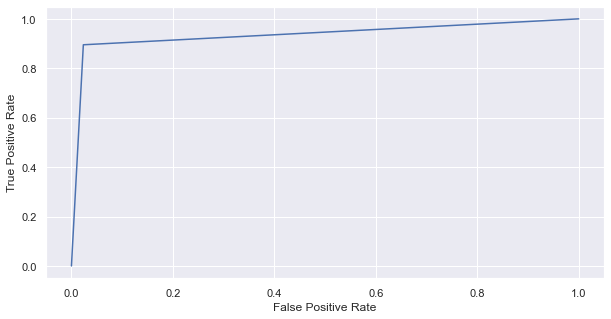

In [101]:
fpr_logit, tpr_logit, _ = metrics.roc_curve(test_data["Class"],  test_data["test_pred"])

#create ROC curve
plt.figure(figsize=(10,5))
plt.plot(fpr_logit,tpr_logit)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [61]:
model_linear = SVC(kernel = "linear")
model_linear.fit(x_train[:100000], y_train[:100000])
pred_test_linear = model_linear.predict(x_test[:20000])
np.mean(pred_test_linear == y_test.Class[:20000])

C:\Users\Thomas Zou\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9992

In [62]:
# kernel = rbf
model_rbf = SVC(kernel = "rbf")
model_rbf.fit(x_train[:100000], y_train[:100000])
pred_test_rbf = model_rbf.predict(x_test[:20000])

np.mean(pred_test_rbf==y_test.Class[:20000])

C:\Users\Thomas Zou\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.99875

In [63]:
# kernel =POLY
model_poly = SVC(kernel = "poly")
model_poly.fit(x_train[:100000], y_train[:100000])
pred_test_poly = model_poly.predict(x_test[:20000])

np.mean(pred_test_poly==y_test.Class[:20000])

C:\Users\Thomas Zou\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.99925

In [64]:
# kernel =sigmoid
model_sig = SVC(kernel = "sigmoid")
model_sig.fit(x_train[:100000], y_train[:100000])
pred_test_sig = model_sig.predict(x_test[:20000])

np.mean(pred_test_sig==y_test.Class[:20000])

C:\Users\Thomas Zou\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9985

In [66]:
classification_test_svm_poly = classification_report(pred_test_poly, y_test.Class[:20000])
print(classification_test_svm_poly)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19966
           1       0.74      0.85      0.79        34

    accuracy                           1.00     20000
   macro avg       0.87      0.93      0.90     20000
weighted avg       1.00      1.00      1.00     20000



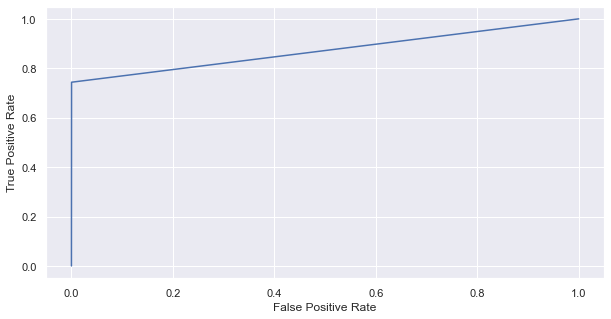

In [100]:
fpr_poly, tpr_poly, _ = metrics.roc_curve(y_test.Class[:20000],  pred_test_poly)

#create ROC curve
plt.figure(figsize=(10,5))
plt.plot(fpr_poly,tpr_poly)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [88]:
x_train_abs=abs(x_train)
x_test_abs=abs(x_test)

In [89]:
classifier_mb = MB()
classifier_mb.fit(x_train_abs, y_train)

C:\Users\Thomas Zou\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

In [90]:
# Evaluation on Test Data
test_pred_nb = classifier_mb.predict(x_test_abs)
accuracy_test = np.mean(test_pred_nb == y_test.Class)
accuracy_test

0.9989700736163291

In [91]:
pd.crosstab(test_pred_nb, y_test.Class)

Class,0,1
row_0,,
0,85280,73
1,15,75


In [92]:
# Training Data accuracy
train_pred_nb = classifier_mb.predict(x_train_abs)
accuracy_train = np.mean(train_pred_nb == y_train.Class)
accuracy_train

0.9990218896089564

In [95]:
classification_test_nb = classification_report(test_pred_nb, y_test.Class)
print(classification_test_nb)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85353
           1       0.51      0.83      0.63        90

    accuracy                           1.00     85443
   macro avg       0.75      0.92      0.81     85443
weighted avg       1.00      1.00      1.00     85443



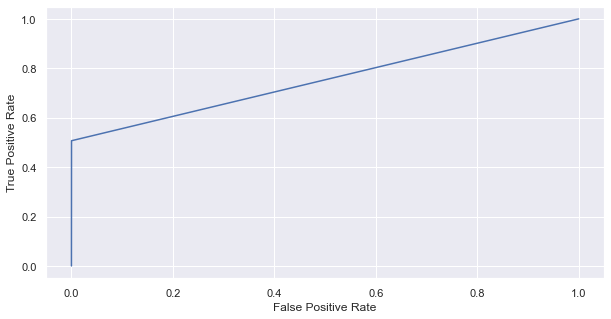

In [98]:
fpr_nb, tpr_nb, _ = metrics.roc_curve(y_test.Class,  test_pred_nb)

#create ROC curve
plt.figure(figsize=(10,5))
plt.plot(fpr_nb,tpr_nb)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [106]:
print("Logistic Regression (logit)\n",classification_test_logit)
print("KNN k=15 \n",classification_test_knn)
print("SVM (poly) \n",classification_test_svm_poly)
print("Naive Bayes \n",classification_test_nb)

Logistic Regression (logit)
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     83313
         1.0       0.90      0.06      0.11      2130

    accuracy                           0.98     85443
   macro avg       0.94      0.53      0.55     85443
weighted avg       0.97      0.98      0.97     85443

KNN k=15 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85329
           1       0.72      0.93      0.81       114

    accuracy                           1.00     85443
   macro avg       0.86      0.96      0.90     85443
weighted avg       1.00      1.00      1.00     85443

SVM (poly) 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19966
           1       0.74      0.85      0.79        34

    accuracy                           1.00     20000
   macro avg       0.87      0.93      0.90     20000
weighted avg       1.

In [103]:
best_k

13

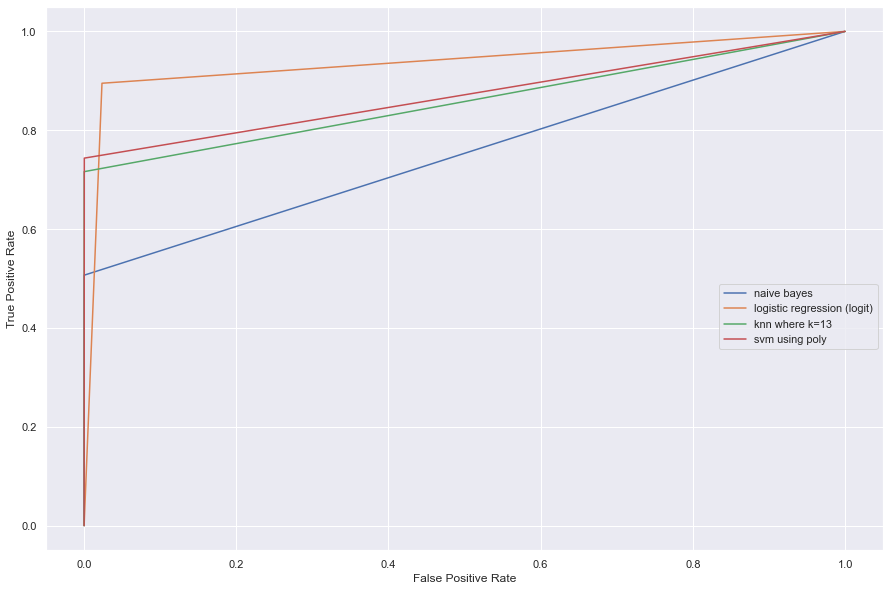

In [105]:
plt.figure(figsize=(15,10))
plt.plot(fpr_nb,tpr_nb,label='naive bayes')
plt.plot(fpr_logit,tpr_logit,label='logistic regression (logit)')
plt.plot(fpr_knn,tpr_knn,label='knn where k=13')
plt.plot(fpr_poly,tpr_poly,label='svm using poly')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5))
plt.show()